<a href="https://colab.research.google.com/github/iamharkirat/BMI598/blob/main/P5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Basic CNN Model

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical

In [2]:
# Load the CIFAR-10 dataset
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

# Normalize the images
X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0

# Convert labels to one-hot encoding
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

170498071/170498071 [==============================] - 2s 0us/step


In [3]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(32, 32, 3)),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


Epoch 1/10
1250/1250 [==============================] - 9s 7ms/step - loss: 1.4308 - accuracy: 0.4868 - val_loss: 1.1802 - val_accuracy: 0.5825
Epoch 2/10
1250/1250 [==============================] - 9s 7ms/step - loss: 1.0076 - accuracy: 0.6475 - val_loss: 1.0853 - val_accuracy: 0.6182
Epoch 3/10
1250/1250 [==============================] - 8s 7ms/step - loss: 0.7594 - accuracy: 0.7346 - val_loss: 1.0296 - val_accuracy: 0.6472
Epoch 4/10
1250/1250 [==============================] - 8s 7ms/step - loss: 0.5221 - accuracy: 0.8213 - val_loss: 1.1802 - val_accuracy: 0.6414
Epoch 5/10
1250/1250 [==============================] - 10s 8ms/step - loss: 0.3088 - accuracy: 0.8943 - val_loss: 1.4076 - val_accuracy: 0.6346
Epoch 6/10
1250/1250 [==============================] - 8s 7ms/step - loss: 0.1672 - accuracy: 0.9444 - val_loss: 1.7926 - val_accuracy: 0.6243
Epoch 7/10
1250/1250 [==============================] - 8s 7ms/step - loss: 0.1110 - accuracy: 0.9632 - val_loss: 2.1107 - val_accuracy

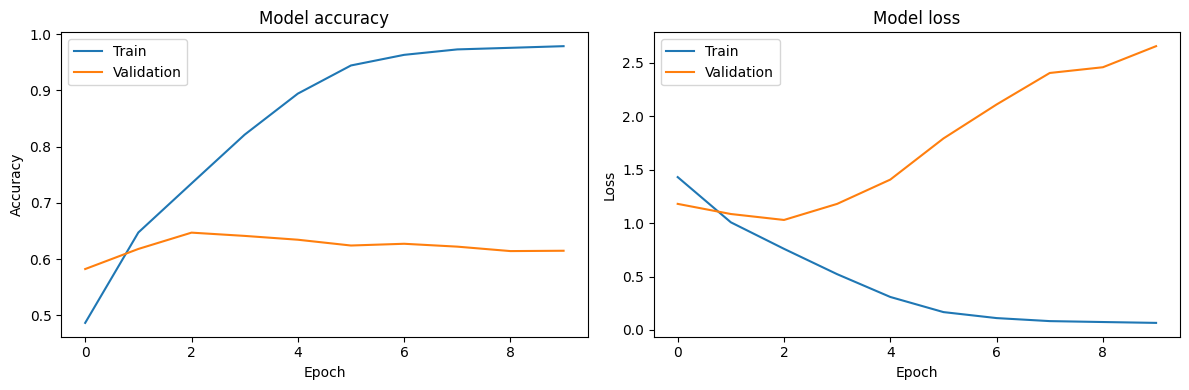

In [6]:
history = model.fit(X_train, y_train, epochs=10, validation_split=0.2)

# Evaluate on test set
test_loss, test_acc = model.evaluate(X_test, y_test)
print("Test Accuracy: ", test_acc)

# Plot training & validation accuracy values
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.tight_layout()
plt.show()


## Phase 2: Adding Pooling Layers

In [9]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(32, 32, 3)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

Epoch 1/10
1250/1250 [==============================] - 7s 5ms/step - loss: 1.4839 - accuracy: 0.4647 - val_loss: 1.2379 - val_accuracy: 0.5677
Epoch 2/10
1250/1250 [==============================] - 6s 5ms/step - loss: 1.1360 - accuracy: 0.6000 - val_loss: 1.0726 - val_accuracy: 0.6302
Epoch 3/10
1250/1250 [==============================] - 6s 4ms/step - loss: 0.9958 - accuracy: 0.6532 - val_loss: 1.0299 - val_accuracy: 0.6434
Epoch 4/10
1250/1250 [==============================] - 6s 5ms/step - loss: 0.8946 - accuracy: 0.6885 - val_loss: 1.0101 - val_accuracy: 0.6479
Epoch 5/10
1250/1250 [==============================] - 5s 4ms/step - loss: 0.8145 - accuracy: 0.7154 - val_loss: 0.9412 - val_accuracy: 0.6738
Epoch 6/10
1250/1250 [==============================] - 7s 5ms/step - loss: 0.7396 - accuracy: 0.7426 - val_loss: 0.9926 - val_accuracy: 0.6643
Epoch 7/10
1250/1250 [==============================] - 6s 4ms/step - loss: 0.6703 - accuracy: 0.7645 - val_loss: 0.9925 - val_accuracy:

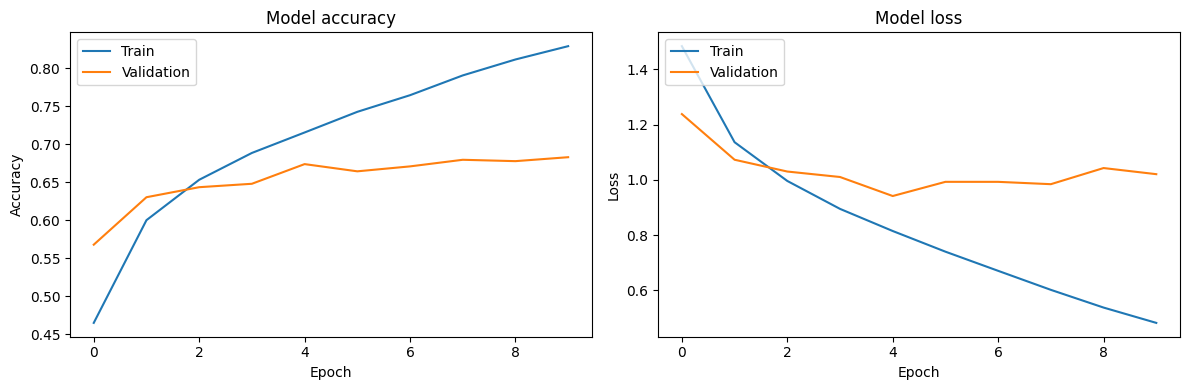

In [10]:
history = model.fit(X_train, y_train, epochs=10, validation_split=0.2)

# Evaluate on test set
test_loss, test_acc = model.evaluate(X_test, y_test)
print("Test Accuracy: ", test_acc)

# Plot training & validation accuracy values
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.tight_layout()
plt.show()

## Phase 3: Adding Dropout

In [11]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(32, 32, 3)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(10, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

Epoch 1/10
1250/1250 [==============================] - 9s 6ms/step - loss: 1.6760 - accuracy: 0.3837 - val_loss: 1.3701 - val_accuracy: 0.5183
Epoch 2/10
1250/1250 [==============================] - 6s 5ms/step - loss: 1.3493 - accuracy: 0.5191 - val_loss: 1.1924 - val_accuracy: 0.5926
Epoch 3/10
1250/1250 [==============================] - 7s 5ms/step - loss: 1.2146 - accuracy: 0.5694 - val_loss: 1.0831 - val_accuracy: 0.6193
Epoch 4/10
1250/1250 [==============================] - 6s 5ms/step - loss: 1.1309 - accuracy: 0.6019 - val_loss: 1.0305 - val_accuracy: 0.6396
Epoch 5/10
1250/1250 [==============================] - 7s 5ms/step - loss: 1.0714 - accuracy: 0.6240 - val_loss: 1.0398 - val_accuracy: 0.6358
Epoch 6/10
1250/1250 [==============================] - 6s 5ms/step - loss: 1.0153 - accuracy: 0.6409 - val_loss: 0.9671 - val_accuracy: 0.6668
Epoch 7/10
1250/1250 [==============================] - 7s 6ms/step - loss: 0.9631 - accuracy: 0.6590 - val_loss: 0.9761 - val_accuracy:

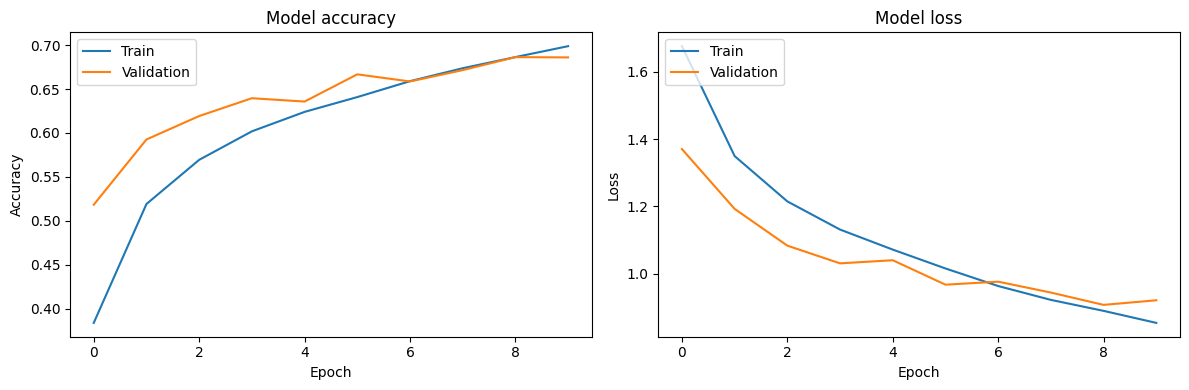

In [12]:
history = model.fit(X_train, y_train, epochs=10, validation_split=0.2)

# Evaluate on test set
test_loss, test_acc = model.evaluate(X_test, y_test)
print("Test Accuracy: ", test_acc)

# Plot training & validation accuracy values
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.tight_layout()
plt.show()

## Phase 4: Transfer Learning with ShuffleNet

In [14]:
base_model = tf.keras.applications.MobileNetV2(input_shape=(32, 32, 3), include_top=False, weights='imagenet')


9406464/9406464 [==============================] - 0s 0us/step


In [15]:
model = tf.keras.models.Sequential([
    base_model,
    tf.keras.layers.GlobalAveragePooling2D(),
    tf.keras.layers.Dense(10, activation='softmax')
])

# Freeze the base model
base_model.trainable = False

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


In [ ]:
history = model.fit(X_train, y_train, epochs=10, validation_split=0.2)

# Evaluate on test set
test_loss, test_acc = model.evaluate(X_test, y_test)
print("Test Accuracy: ", test_acc)

# Plot training & validation accuracy values
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.tight_layout()
plt.show()

Epoch 1/10
1250/1250 [==============================] - 16s 10ms/step - loss: 2.0770 - accuracy: 0.2702 - val_loss: 1.9731 - val_accuracy: 0.3091
Epoch 2/10
1250/1250 [==============================] - 12s 10ms/step - loss: 1.9460 - accuracy: 0.3054 - val_loss: 1.9242 - val_accuracy: 0.3161
Epoch 3/10
1250/1250 [==============================] - 12s 9ms/step - loss: 1.9135 - accuracy: 0.3129 - val_loss: 1.9066 - val_accuracy: 0.3207
Epoch 4/10
1243/1250 [============================>.] - ETA: 0s - loss: 1.8987 - accuracy: 0.3153